# Can DVOA win in the pool?
So far, we've looked at the correct wins each person in the pool picked each week in the 2017 and 2018 seasons as well as their total wins across the season. We've also looked at the NFL game results from the 2017 and 2018 seasons and counted the number of times that DVOA (and DVOA varieties) were able to correctly pick winners each week and in total across the season. 

Now, we will look at how DVOA stacks up agianst the pool. Can DVOA pick enough games correctly to win in individial weeks and across the whole season, or is DVOA just another average picker in the pool?

In [405]:
## Imports for data processing and plotting
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
%matplotlib inline
import seaborn as sns
from matplotlib.patches import Rectangle

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Plot settings
plt.rcParams['xtick.major.width'] = .9
plt.rcParams['xtick.major.size'] = 8.
plt.rcParams['xtick.minor.size'] = 5.
plt.rcParams['xtick.minor.width'] = .9
plt.rcParams['xtick.labelsize'] = 19.
plt.rcParams['ytick.major.width'] = .9
plt.rcParams['ytick.major.size'] = 8.
plt.rcParams['ytick.minor.size'] = 5.
plt.rcParams['ytick.minor.width'] = .9
plt.rcParams['ytick.labelsize'] = 19.
plt.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.labelsize'] = 20.
matplotlib.rcParams['agg.path.chunksize'] = 10000
col1 = cm.viridis(np.linspace(0,0.8,13))
col2 = cm.Set2(np.linspace(0,1,8))
col3 = cm.Set3(np.linspace(0,1,12))

In [406]:
indir = '/Users/sydney/Desktop/data_science/NFL_pickem_DVOA/'
outdir = indir

# Read in all the files (pool results and DVOA results)

In [407]:
### Pool Results
poolResults17 = pd.read_csv(indir + '2017_shirAmi_data/winsByWeek_2017.csv')
poolResults18 = pd.read_csv(indir + '2018_shirAmi_data/winsByWeek_2018.csv')

### DVOA Results
total_dvoaResults17 = pd.read_csv(indir + '2017_FO_DVOA_data/totalWins_2017.csv')
total_dvoaResults18 = pd.read_csv(indir + '2018_FO_DVOA_data/totalWins_2018.csv')

weekly_dvoaResults17 = pd.read_csv(indir + '2017_FO_DVOA_data/winsByWeek_2017.csv')
weekly_dvoaResults18 = pd.read_csv(indir + '2018_FO_DVOA_data/winsByWeek_2018.csv')

In [408]:
### How well did I do in both seasons?
idx_syd17 = np.where(poolResults17['Name'] == 'Agent of S.H.E.L.A.')[0]
syd_winsByWeek17 = [poolResults17['week_01'][idx_syd17], poolResults17['week_02'][idx_syd17],
                poolResults17['week_03'][idx_syd17], poolResults17['week_04'][idx_syd17],
                poolResults17['week_05'][idx_syd17], poolResults17['week_06'][idx_syd17],
                poolResults17['week_07'][idx_syd17], poolResults17['week_08'][idx_syd17],
                poolResults17['week_09'][idx_syd17], poolResults17['week_10'][idx_syd17],
                poolResults17['week_11'][idx_syd17], poolResults17['week_12'][idx_syd17], 
                poolResults17['week_13'][idx_syd17], poolResults17['week_14'][idx_syd17],
                poolResults17['week_15'][idx_syd17], poolResults17['week_16'][idx_syd17],
                poolResults17['week_17'][idx_syd17]]

idx_syd18 = np.where(poolResults18['Name'] == 'Knead A Win')[0]
syd_winsByWeek18 = [poolResults18['week_01'][idx_syd18], poolResults18['week_02'][idx_syd18],
                poolResults18['week_03'][idx_syd18], poolResults18['week_04'][idx_syd18],
                poolResults18['week_05'][idx_syd18], poolResults18['week_06'][idx_syd18],
                poolResults18['week_07'][idx_syd18], poolResults18['week_08'][idx_syd18],
                poolResults18['week_09'][idx_syd18], poolResults18['week_10'][idx_syd18],
                poolResults18['week_11'][idx_syd18], poolResults18['week_12'][idx_syd18], 
                poolResults18['week_13'][idx_syd18], poolResults18['week_14'][idx_syd18],
                poolResults18['week_15'][idx_syd18], poolResults18['week_16'][idx_syd18],
                poolResults18['week_17'][idx_syd18]]

# How does the pool do each week?
For each week pool participants can get between 0 and 16 correct picks. Let's make a heat map showing the distribution of correct picks each week by pool participants. 

In [409]:
### 2017 Data
# Bin the data from each week
ngames_arr = np.arange(0,18,1)
w1_poolPicks17 = np.histogram(poolResults17['week_01'], bins = ngames_arr)
w2_poolPicks17 = np.histogram(poolResults17['week_02'], bins = ngames_arr)
w3_poolPicks17 = np.histogram(poolResults17['week_03'], bins = ngames_arr)
w4_poolPicks17 = np.histogram(poolResults17['week_04'], bins = ngames_arr)
w5_poolPicks17 = np.histogram(poolResults17['week_05'], bins = ngames_arr)
w6_poolPicks17 = np.histogram(poolResults17['week_06'], bins = ngames_arr)
w7_poolPicks17 = np.histogram(poolResults17['week_07'], bins = ngames_arr)
w8_poolPicks17 = np.histogram(poolResults17['week_08'], bins = ngames_arr)
w9_poolPicks17 = np.histogram(poolResults17['week_09'], bins = ngames_arr)
w10_poolPicks17 = np.histogram(poolResults17['week_10'], bins = ngames_arr)
w11_poolPicks17 = np.histogram(poolResults17['week_11'], bins = ngames_arr)
w12_poolPicks17 = np.histogram(poolResults17['week_12'], bins = ngames_arr)
w13_poolPicks17 = np.histogram(poolResults17['week_13'], bins = ngames_arr)
w14_poolPicks17 = np.histogram(poolResults17['week_14'], bins = ngames_arr)
w15_poolPicks17 = np.histogram(poolResults17['week_15'], bins = ngames_arr)
w16_poolPicks17 = np.histogram(poolResults17['week_16'], bins = ngames_arr)
w17_poolPicks17 = np.histogram(poolResults17['week_17'], bins = ngames_arr)

wAll_hist17 = np.vstack((w1_poolPicks17[0],w2_poolPicks17[0],w3_poolPicks17[0],w4_poolPicks17[0],
          w5_poolPicks17[0],w6_poolPicks17[0],w7_poolPicks17[0],w8_poolPicks17[0],
          w9_poolPicks17[0],w10_poolPicks17[0],w11_poolPicks17[0],w12_poolPicks17[0],
          w13_poolPicks17[0],w14_poolPicks17[0],w15_poolPicks17[0],w16_poolPicks17[0],w17_poolPicks17[0]))

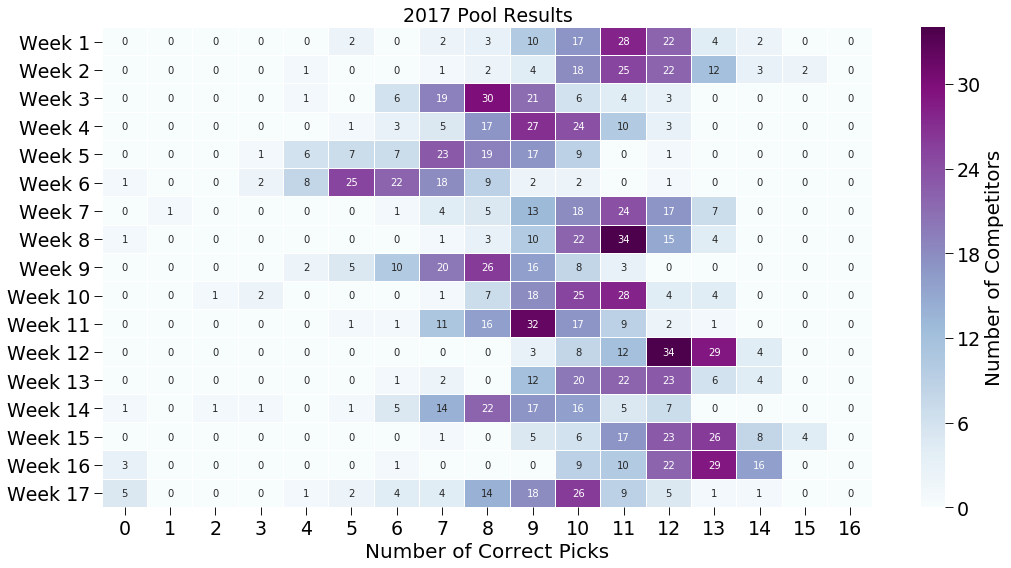

In [410]:
### 2017 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist17, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2017 Pool Results', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

plt.tight_layout()
plt.savefig(outdir+'plots_for_blog/poolResults_2017.jpg', format='jpg');

In [411]:
### 2018 Data
# Bin the data from each week
ngames_arr = np.arange(0,18,1)
w1_poolPicks18 = np.histogram(poolResults18['week_01'], bins = ngames_arr)
w2_poolPicks18 = np.histogram(poolResults18['week_02'], bins = ngames_arr)
w3_poolPicks18 = np.histogram(poolResults18['week_03'], bins = ngames_arr)
w4_poolPicks18 = np.histogram(poolResults18['week_04'], bins = ngames_arr)
w5_poolPicks18 = np.histogram(poolResults18['week_05'], bins = ngames_arr)
w6_poolPicks18 = np.histogram(poolResults18['week_06'], bins = ngames_arr)
w7_poolPicks18 = np.histogram(poolResults18['week_07'], bins = ngames_arr)
w8_poolPicks18 = np.histogram(poolResults18['week_08'], bins = ngames_arr)
w9_poolPicks18 = np.histogram(poolResults18['week_09'], bins = ngames_arr)
w10_poolPicks18 = np.histogram(poolResults18['week_10'], bins = ngames_arr)
w11_poolPicks18 = np.histogram(poolResults18['week_11'], bins = ngames_arr)
w12_poolPicks18 = np.histogram(poolResults18['week_12'], bins = ngames_arr)
w13_poolPicks18 = np.histogram(poolResults18['week_13'], bins = ngames_arr)
w14_poolPicks18 = np.histogram(poolResults18['week_14'], bins = ngames_arr)
w15_poolPicks18 = np.histogram(poolResults18['week_15'], bins = ngames_arr)
w16_poolPicks18 = np.histogram(poolResults18['week_16'], bins = ngames_arr)
w17_poolPicks18 = np.histogram(poolResults18['week_17'], bins = ngames_arr)

wAll_hist18 = np.vstack((w1_poolPicks18[0],w2_poolPicks18[0],w3_poolPicks18[0],w4_poolPicks18[0],
          w5_poolPicks18[0],w6_poolPicks18[0],w7_poolPicks18[0],w8_poolPicks18[0],
          w9_poolPicks18[0],w10_poolPicks18[0],w11_poolPicks18[0],w12_poolPicks18[0],
          w13_poolPicks18[0],w14_poolPicks18[0],w15_poolPicks18[0],w16_poolPicks18[0],w17_poolPicks18[0]))

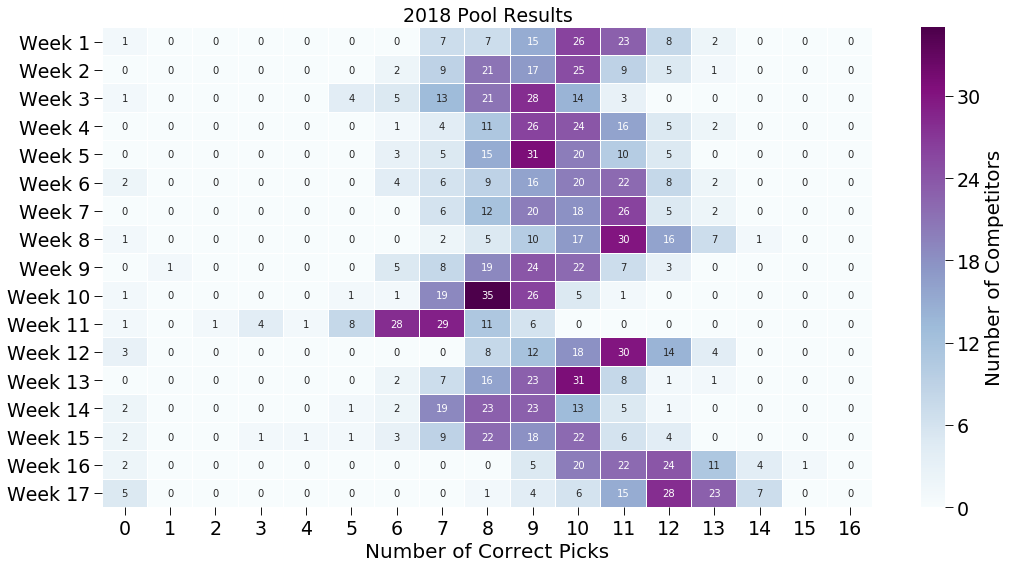

In [412]:
### 2018 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist18, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2018 Pool Results', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

plt.tight_layout()
plt.savefig(outdir+'plots_for_blog/poolResults_2018.jpg', format='jpg');

# DVOA Only vs Pool
Can total DVOA alone beat the pool?

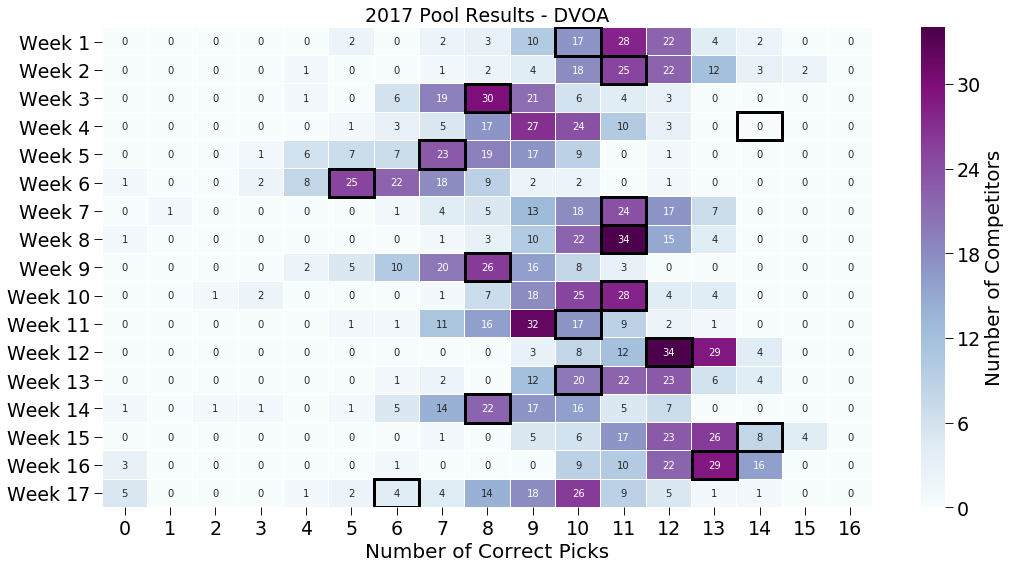

In [413]:
### 2017 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist17, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2017 Pool Results - DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults17['DVOA Only'][w], w), 1, 1, fill=None, linewidth=3, 
                           alpha=1, zorder=10))

plt.tight_layout()
plt.savefig(outdir+'plots_for_blog/dvoaResults_2017.jpg', format='jpg');

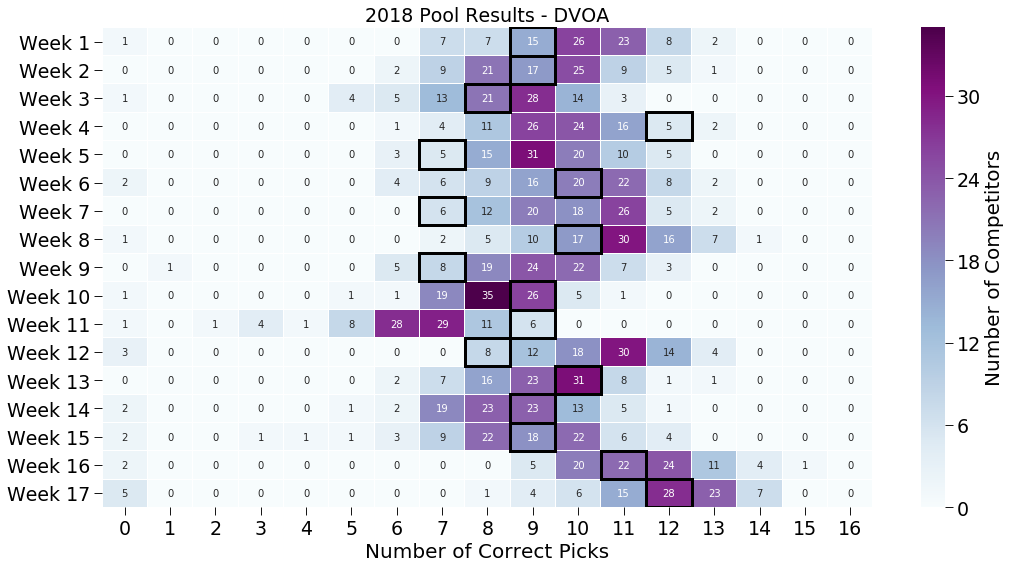

In [414]:
### 2018 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist18, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2018 Pool Results - DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults18['DVOA Only'][w], w), 1, 1, fill=None, linewidth=3, 
                           alpha=1, zorder=10))

plt.tight_layout()
plt.savefig(outdir+'plots_for_blog/dvoaResults_2018.jpg', format='jpg');

### DVOA alone is not enough to beat the pool each week. There are only two instances where DVOA would have won (week 4 of 2017 and week 11 of 2018). In all other weeks, DVOA tends to do as well as the majority of pool competitors. 

# DAVE & DVOA vs the pool
If we use DAVE for the first half of the season and DVOA for the second half, can we beat the pool?

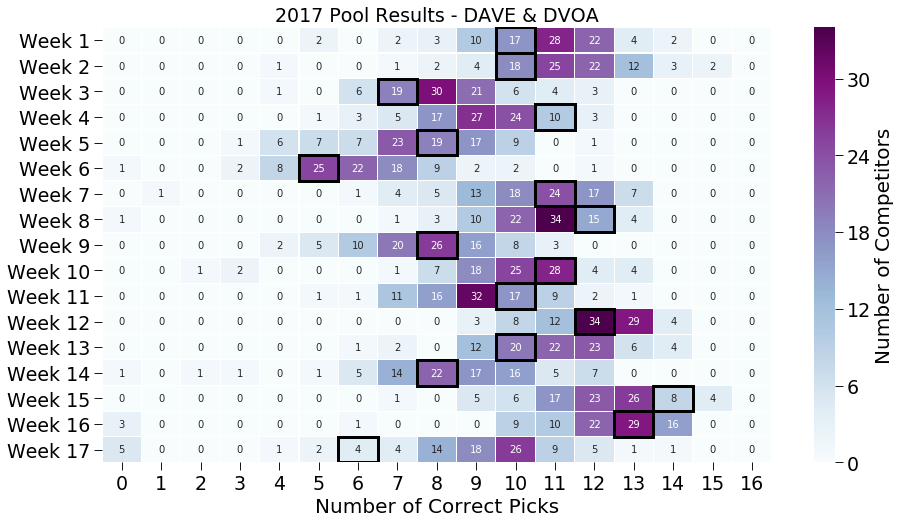

In [415]:
### 2017 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist17, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2017 Pool Results - DAVE & DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults17['DAVE to DVOA'][w], w), 1, 1, fill=None, 
                           linewidth=3, alpha=1, zorder=10))

plt.show();

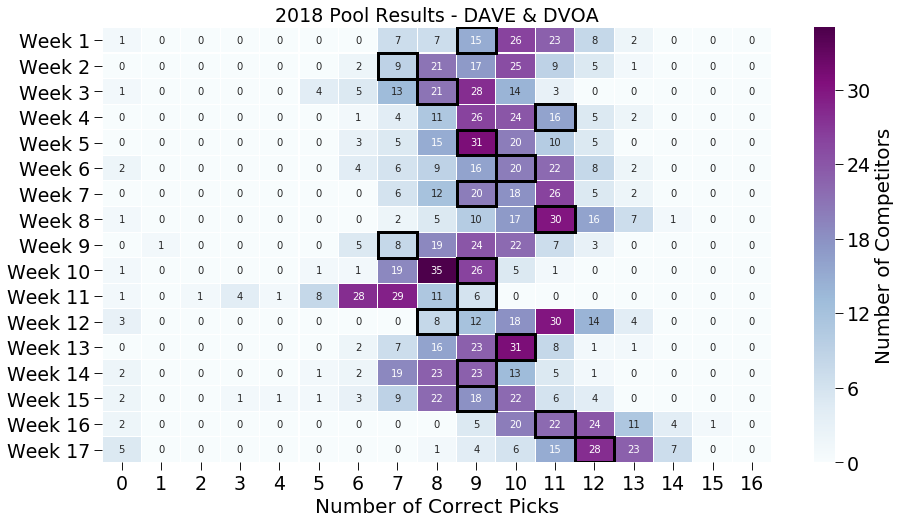

In [416]:
### 2018 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist18, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2018 Pool Results - DAVE & DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults18['DAVE to DVOA'][w], w), 1, 1, fill=None, linewidth=3, 
                           alpha=1, zorder=10))

plt.show();

### Using DAVE at the beginning of the season will not win any weeks in the pool

# DVOA & WDVOA vs the pool
Try using DVOA in the first half of the season and weighted DVOA in the second half of the season. This places greater weight on the most recent games. 

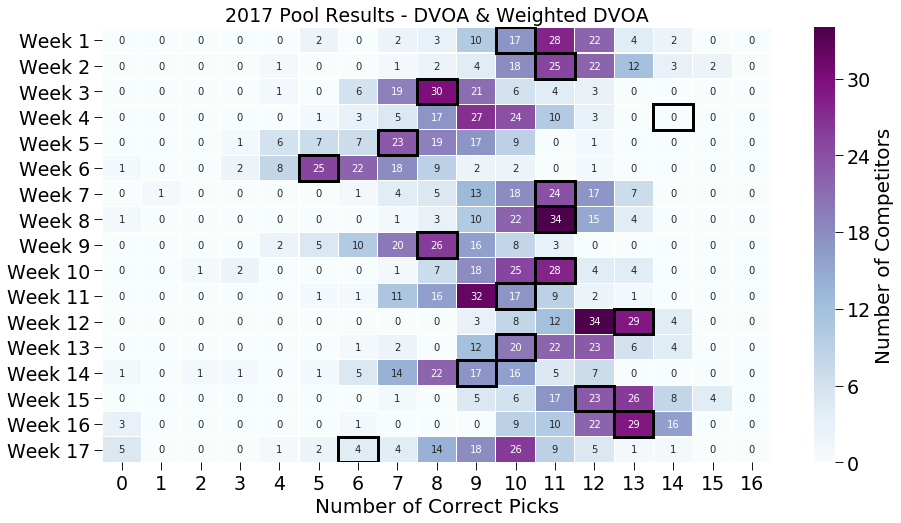

In [417]:
### 2017 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist17, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2017 Pool Results - DVOA & Weighted DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults17['DVOA to WDVOA'][w], w), 1, 1, fill=None, 
                           linewidth=3, alpha=1, zorder=10))

plt.show();

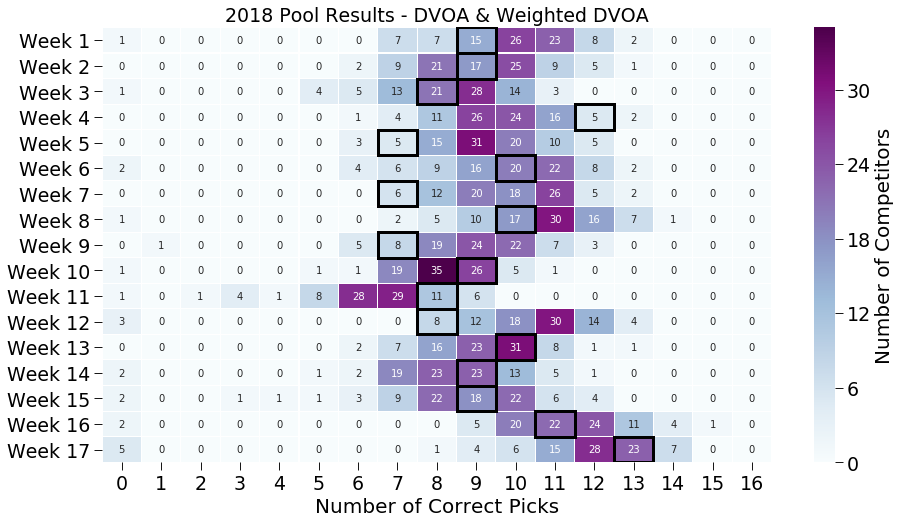

In [418]:
### 2018 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist18, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2018 Pool Results - DVOA & Weighted DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults18['DVOA to WDVOA'][w], w), 1, 1, fill=None, linewidth=3, 
                           alpha=1, zorder=10))

plt.show();

### This is not an improvement over DVOA alone. 
Using just DVOA we were able to win the pool in week 4 of 2017, and we see this win again here because our system uses DVOA in the first half of the season. Incorporating weighted DVOA does not give us an advantage over the pool in the latter half of the season. 

# DAVE & WDVOA vs the pool
Try using DAVE in the first half of the season and weighted DVOA in the second half of the season. This adjusts for preseason predictions in the first half of the season and places greater weight on the most recent games in the second half of the season.

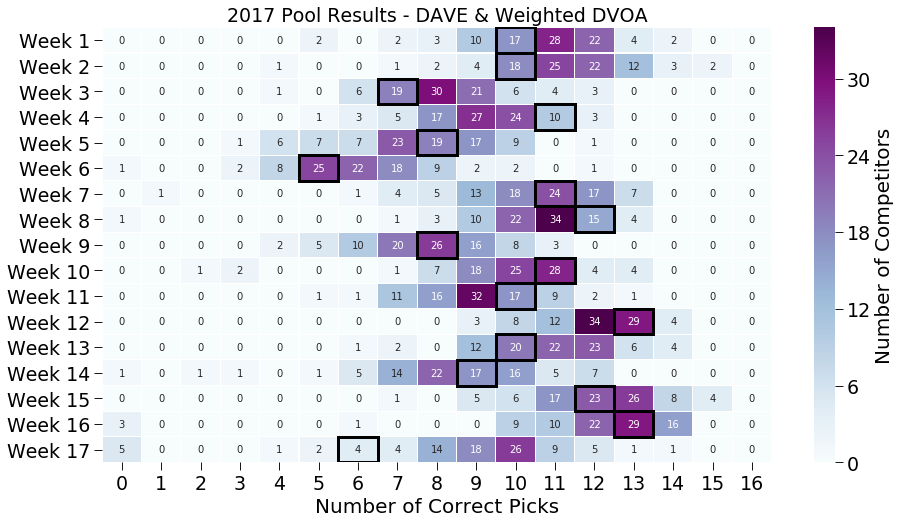

In [419]:
### 2017 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist17, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2017 Pool Results - DAVE & Weighted DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults17['DAVE to WDVOA'][w], w), 1, 1, fill=None, 
                           linewidth=3, alpha=1, zorder=10))

plt.show();

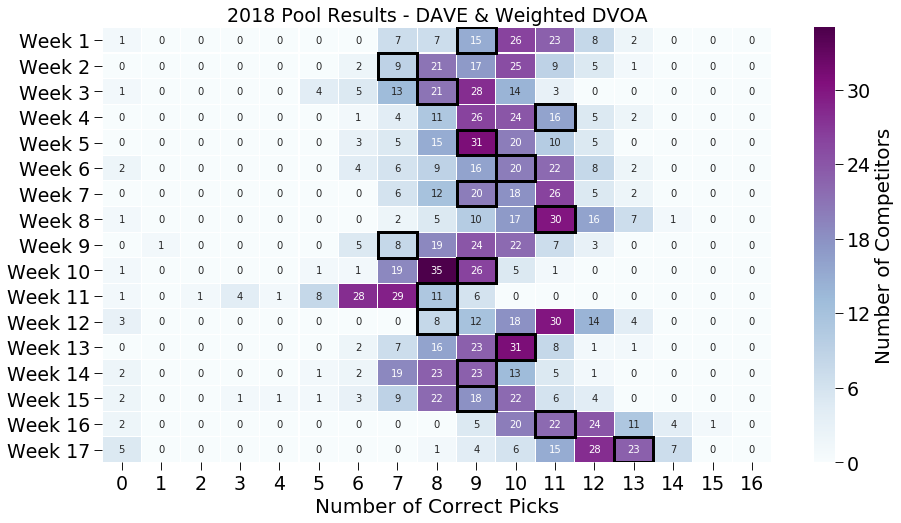

In [420]:
### 2018 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist18, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2018 Pool Results - DAVE & Weighted DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults18['DAVE to WDVOA'][w], w), 1, 1, fill=None, linewidth=3, 
                           alpha=1, zorder=10))

plt.show();

### Using DAVE and weighted DVOA will not put us at the top of the pool in any weeks

# Offensive DVOA vs the pool
DVOA is given not just for the team, but also for the offense alone. Let's see if offensive DVOA can beat the pool. 

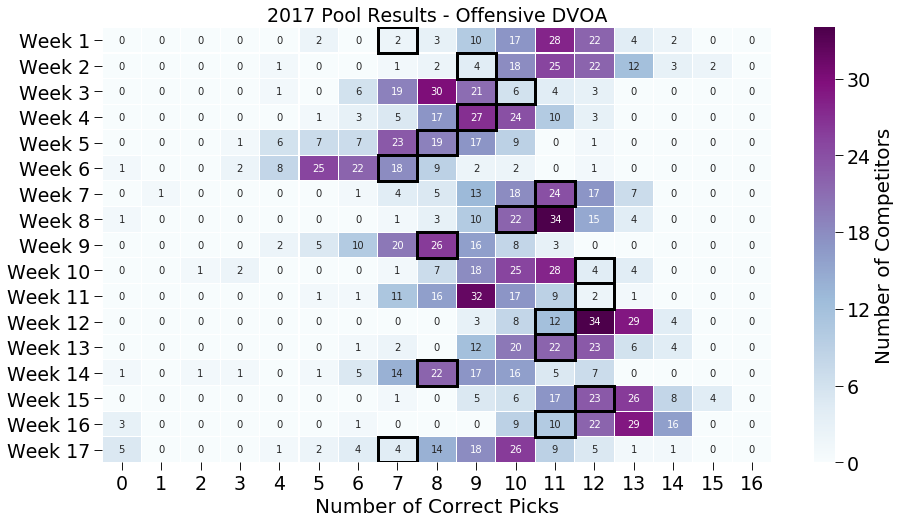

In [421]:
### 2017 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist17, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2017 Pool Results - Offensive DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults17['OFF DVOA'][w], w), 1, 1, fill=None, 
                           linewidth=3, alpha=1, zorder=10))

plt.show();

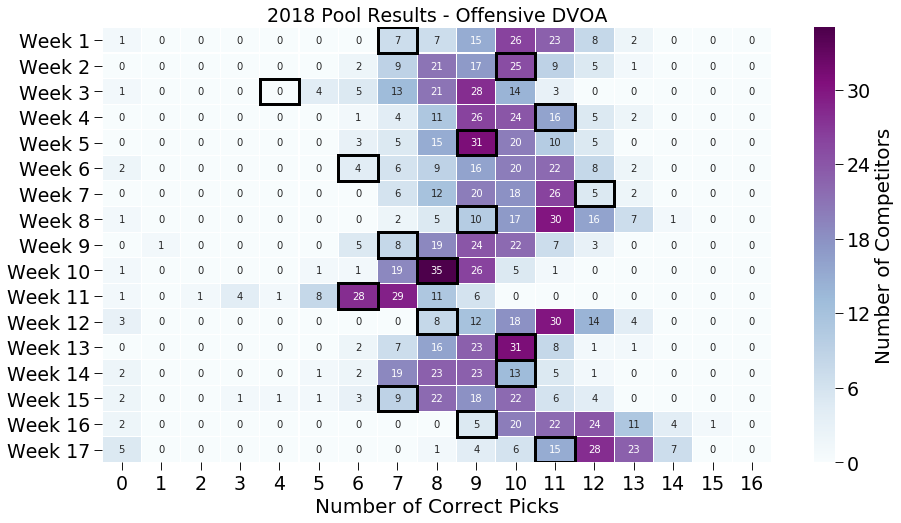

In [422]:
### 2018 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist18, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2018 Pool Results - Offensive DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults18['OFF DVOA'][w], w), 1, 1, fill=None, linewidth=3, 
                           alpha=1, zorder=10))

plt.show();

### Offensive DVOA generally picks with or worse than the pool
In the case of week 11 in 2017, offensive DVOA earned 2nd or 3rd place (depending on tie breaker selection), however in all other weeks it tends to do worse at picking game winners than the pool competitors. 

# Defensive DVOA vs the pool
DVOA is given not just for the team, but also for the defense alone. Let's see if defensive DVOA can beat the pool.

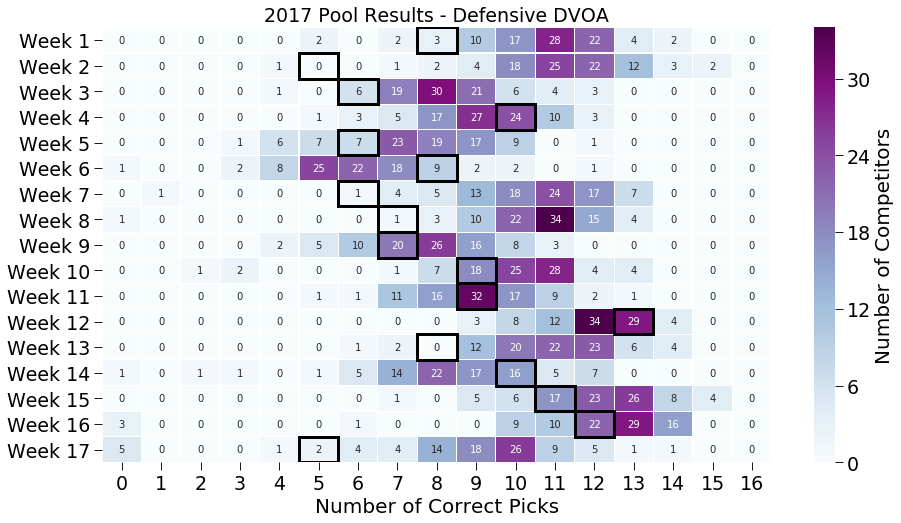

In [423]:
### 2017 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist17, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2017 Pool Results - Defensive DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults17['DEF DVOA'][w], w), 1, 1, fill=None, 
                           linewidth=3, alpha=1, zorder=10))

plt.show();

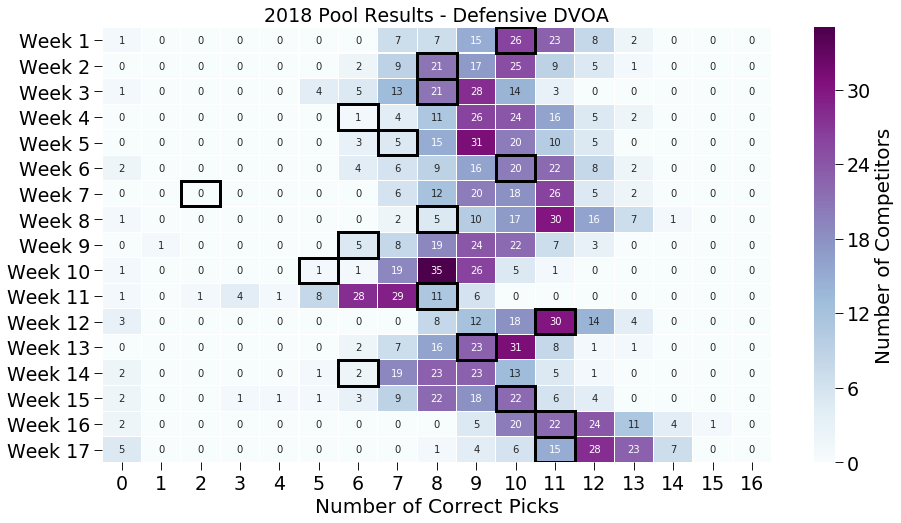

In [424]:
### 2018 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist18, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2018 Pool Results - Defensive DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults18['DEF DVOA'][w], w), 1, 1, fill=None, linewidth=3, 
                           alpha=1, zorder=10))

plt.show();

### Defensive DVOA would not have won the pool in any week, and tends to pick worse than the pool does

# Special Teams DVOA vs the pool
DVOA is given not just for the team, but also for the special teams alone. Let's see if special teams DVOA can beat the pool.

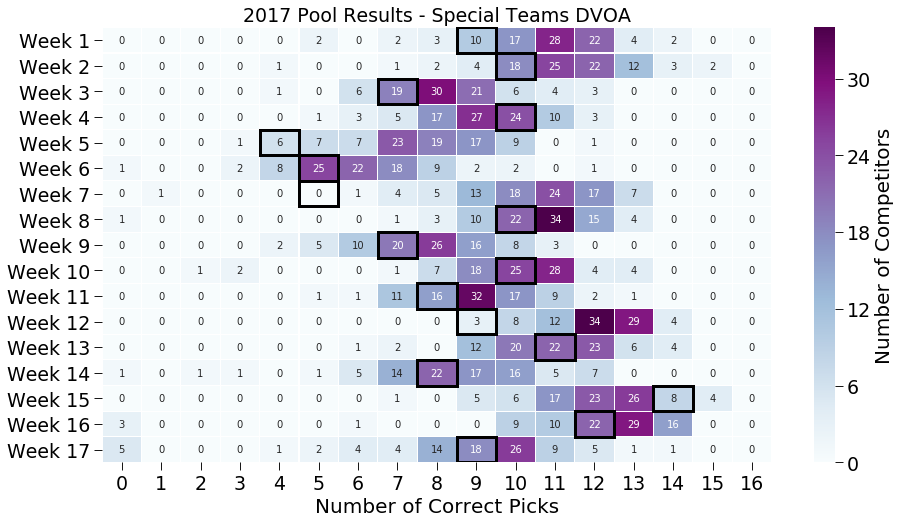

In [425]:
### 2017 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist17, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2017 Pool Results - Special Teams DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults17['ST DVOA'][w], w), 1, 1, fill=None, 
                           linewidth=3, alpha=1, zorder=10))

plt.show();

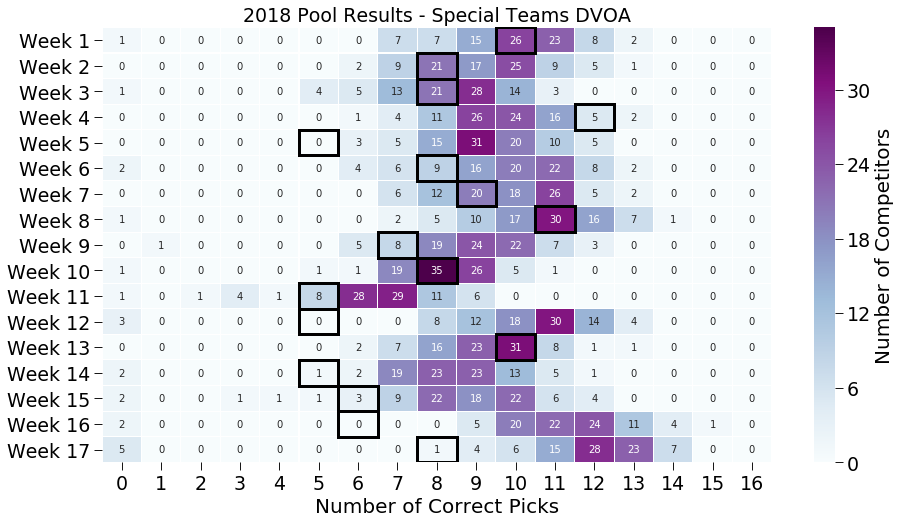

In [426]:
### 2018 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist18, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2018 Pool Results - Special Teams DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults18['ST DVOA'][w], w), 1, 1, fill=None, linewidth=3, 
                           alpha=1, zorder=10))

plt.show();

### Special teams DVOA performs worse than the pool in all most weeks

# Discussion of DVOA Measures in the weekly pool 
Many different measures of DVOA are given by Football Outsiders and each of these try to capture the intricacies of the game of football and how it changes each week. In terms of using DVOA and its many varieties when competing in a straight-up pick-em pool, plain vanilla DVOA is the best choice if you want to maximize weekly wins (~1 per season). 

Winning one week in a season seems small, especially when you consider that using DVOA to make picks gives you the power of statistics. In the end, however, DVOA seems to go with the crowd and pick about as well as a well-informed pool competitor. 

For a football fan like me that enjoys watching the occasional game but doesn't pay too much attention to individual players and how they contribute to their team success on a weekly basis, DVOA is a viable way of staying competitive in a pick-em pool. See the plot below showing my picks vs DVOA for 2018. In 2018 I picked the team that the majority of football analysts and commentators who publish their weekly predictions picked. In a sense, the heat map below shows the power of DVOA vs football analysts!

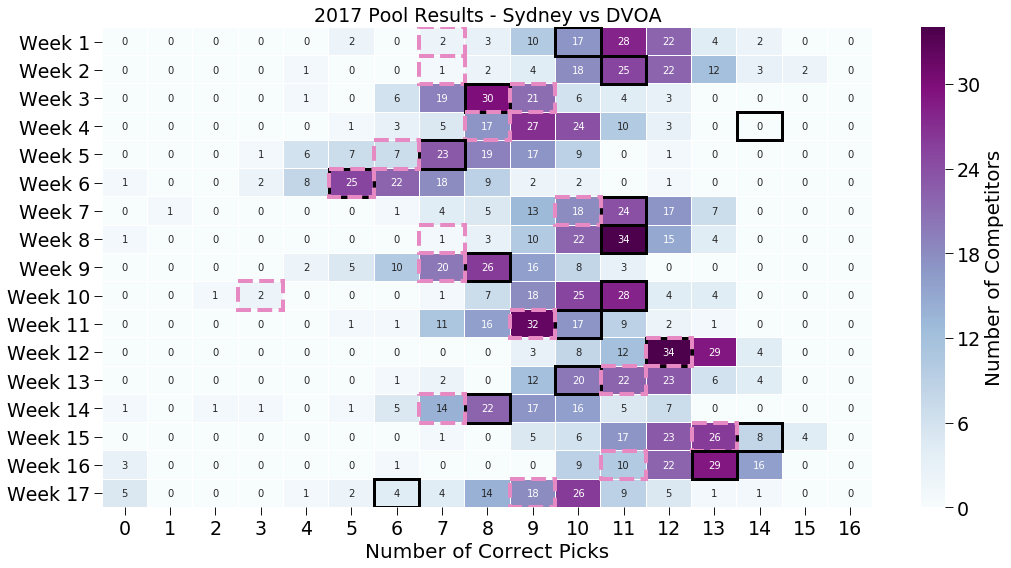

In [433]:
### 2017 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist17, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2017 Pool Results - Sydney vs DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults17['DVOA Only'][w], w), 1, 1, fill=None, linewidth=3, 
                           alpha=1, zorder=10))
    ax.add_patch(Rectangle((syd_winsByWeek17[w], w), 1, 1, fill=None, color = col2[3], linewidth=4, 
                           linestyle='--', alpha=1, zorder=10))

plt.tight_layout()
plt.savefig(outdir+'plots_for_blog/dvoaVpoolVsydney_2017.jpg', format='jpg');

### Results:
- My picks (pink dashed rectangles) were able to beat the DVOA predictor only twice
- I lost to the DVOA predictor in 12 weeks
- We tied in 1 week

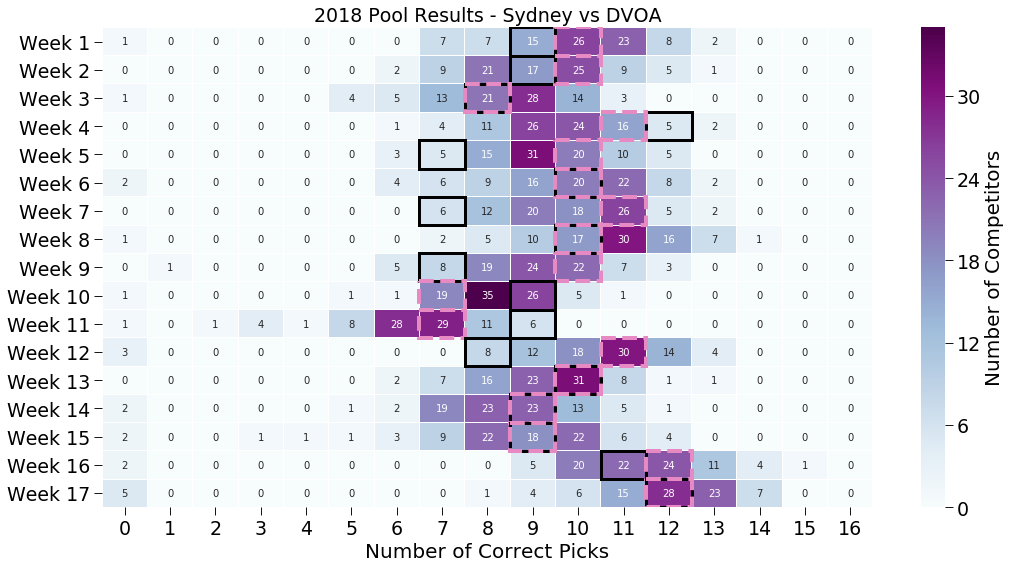

In [432]:
### 2018 Heatmap of weekly results
fig=plt.figure(figsize=(15.0,8.0))

yticks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 
          'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 
          'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17']
ax = sns.heatmap(wAll_hist18, linewidth=0.01, yticklabels=yticks, 
            cmap='BuPu', annot=True, cbar_kws={'label': 'Number of Competitors'})
ax.set_title('2018 Pool Results - Sydney vs DVOA', fontsize=19)
ax.set_xlabel('Number of Correct Picks')

## Highlight my DVOA score from each week
week_arr = np.arange(0,17,1)
for w in week_arr:
    ax.add_patch(Rectangle((weekly_dvoaResults18['DVOA Only'][w], w), 1, 1, fill=None, linewidth=3, 
                           alpha=1, zorder=10))
    ax.add_patch(Rectangle((syd_winsByWeek18[w], w), 1, 1, fill=None, color = col2[3], linewidth=4, linestyle='--', alpha=1, zorder=10))

plt.tight_layout()
plt.savefig(outdir+'plots_for_blog/dvoaVpoolVsydney_2018.jpg', format='jpg');

### Results:
- My picks (pink dashed rectangles) were able to beat the DVOA predictor (solid black rectangles) in 7 weeks (!!!)
- I lost to the DVOA predictor in 3 weeks
- We tied in 7 weeks

# Total wins across all weeks - pool vs DVOA
If you don't win (or come in 2nd or 3rd) in any of the 17 weeks of the season, all hope is not lost! If you were a consistently good picker throughout the season there is the potential to win in the total wins category. In this category, the top 10 win prize money (if there are ties then the prizes combine).

Could DVOA have won in the total season wins catagory in the 2017 or 2018 seasons?

In [428]:
### Make total wins histograms for pool
uniqueWins = np.unique(np.concatenate((poolResults17['total_wins'], poolResults18['total_wins'])))

totWinsHist17 = np.histogram(poolResults17['total_wins'], bins = uniqueWins)
totWinsHist18 = np.histogram(poolResults18['total_wins'], bins = uniqueWins)

totWinsAll = np.vstack((totWinsHist17[0], totWinsHist18[0]))

In [429]:
### 2017 end of season standings
num_1stPlace17 = totWinsHist17[0][-1]
num_2ndPlace17 = totWinsHist17[0][-2]
num_3rdPlace17 = totWinsHist17[0][-3]
num_4thPlace17 = totWinsHist17[0][-4]
num_5thPlace17 = totWinsHist17[0][-5]

wins_1stPlace17 = totWinsHist17[1][-1]
wins_2ndPlace17 = totWinsHist17[1][-2]
wins_3rdPlace17 = totWinsHist17[1][-3]
wins_4thPlace17 = totWinsHist17[1][-4]
wins_5thPlace17 = totWinsHist17[1][-5]

### 2018 end of season standings
num_1stPlace18 = totWinsHist18[0][-2]
num_2ndPlace18 = totWinsHist18[0][-7]
num_3rdPlace18 = totWinsHist18[0][-9]
num_4thPlace18 = totWinsHist18[0][-10]
num_5thPlace18 = totWinsHist18[0][-11]
num_6thPlace18 = totWinsHist18[0][-12]

wins_1stPlace18 = totWinsHist18[1][-2]
wins_2ndPlace18 = totWinsHist18[1][-7]
wins_3rdPlace18 = totWinsHist18[1][-9]
wins_4thPlace18 = totWinsHist18[1][-10]
wins_5thPlace18 = totWinsHist18[1][-11]
wins_6thPlace18 = totWinsHist18[1][-12]

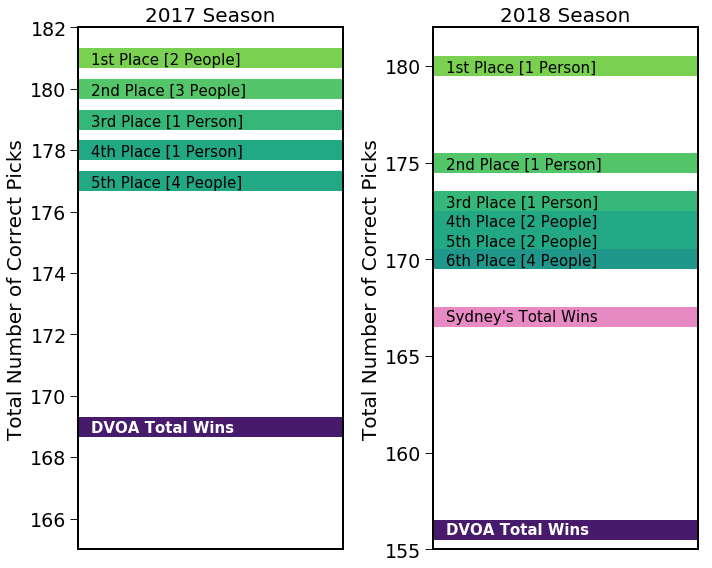

In [431]:
## Set up plot
fig=plt.figure(figsize=(10,8.0))
col4 = cm.BuPu(np.linspace(0,1,12))

###########################
# 2017 Season
###########################
ax1=fig.add_subplot(121)
plt.plot([0,10], [1,1]) ## To set up the axes but not show up

### 1st place
plt.axhline(wins_1stPlace17, color = col1[12], linewidth = 20)
plt.annotate('1st Place ['+str(int(num_1stPlace17))+' People]', xy=(0.5, wins_1stPlace17-0.2), 
             xytext=(0.5, wins_1stPlace17-0.2), fontsize=15)

### 2nd place
plt.axhline(wins_2ndPlace17, color = col1[11], linewidth = 20)
plt.annotate('2nd Place ['+str(int(num_2ndPlace17))+' People]', xy=(0.5, wins_2ndPlace17-0.2), 
             xytext=(0.5, wins_2ndPlace17-0.2), fontsize=15)

### 3rd place
plt.axhline(wins_3rdPlace17, color = col1[10], linewidth = 20)
plt.annotate('3rd Place ['+str(int(num_3rdPlace17))+' Person]', xy=(0.5, wins_3rdPlace17-0.2), 
             xytext=(0.5, wins_3rdPlace17-0.2), fontsize=15)

### 4th place
plt.axhline(wins_4thPlace17, color = col1[9], linewidth = 20)
plt.annotate('4th Place ['+str(int(num_4thPlace17))+' Person]', xy=(0.5, wins_4thPlace17-0.2), 
             xytext=(0.5, wins_4thPlace17-0.2), fontsize=15)

### 5th place
plt.axhline(wins_5thPlace17, color = col1[9], linewidth = 20)
plt.annotate('5th Place ['+str(int(num_5thPlace17))+' People]', xy=(0.5, wins_5thPlace17-0.2), 
             xytext=(0.5, wins_5thPlace17-0.2), fontsize=15)

### DVOA Total
plt.axhline(total_dvoaResults17['DVOA Only'][0], color = col1[1], linewidth = 20)
plt.annotate('DVOA Total Wins', xy=(0.5, total_dvoaResults17['DVOA Only'][0]-0.2), 
             xytext=(0.5, total_dvoaResults17['DVOA Only'][0]-0.2), fontsize=15, color='white', fontweight='heavy')

plt.ylabel('Total Number of Correct Picks')
plt.title('2017 Season', fontsize=20)

plt.ylim([165,182])
plt.xlim([0,10])

plt.tick_params(axis='x', which='both',bottom=False, top=False, labelbottom=False)

###########################
# 2018 Season
###########################
ax1=fig.add_subplot(122)
plt.plot([0,10], [1,1]) ## To set up the axes but not show up

### 1st place
plt.axhline(wins_1stPlace18, color = col1[12], linewidth = 20)
plt.annotate('1st Place ['+str(int(num_1stPlace18))+' Person]', xy=(0.5, wins_1stPlace18-0.3), 
             xytext=(0.5, wins_1stPlace18-0.3), fontsize=15)

### 2nd place
plt.axhline(wins_2ndPlace18, color = col1[11], linewidth = 20)
plt.annotate('2nd Place ['+str(int(num_2ndPlace18))+' Person]', xy=(0.5, wins_2ndPlace18-0.3), 
             xytext=(0.5, wins_2ndPlace18-0.3), fontsize=15)

### 3rd place
plt.axhline(wins_3rdPlace18, color = col1[10], linewidth = 20)
plt.annotate('3rd Place ['+str(int(num_3rdPlace18))+' Person]', xy=(0.5, wins_3rdPlace18-0.3), 
             xytext=(0.5, wins_3rdPlace18-0.3), fontsize=15)

### 4th place
plt.axhline(wins_4thPlace18, color = col1[9], linewidth = 20)
plt.annotate('4th Place ['+str(int(num_4thPlace18))+' People]', xy=(0.5, wins_4thPlace18-0.3), 
             xytext=(0.5, wins_4thPlace18-0.3), fontsize=15)

### 5th place
plt.axhline(wins_5thPlace18, color = col1[9], linewidth = 20)
plt.annotate('5th Place ['+str(int(num_5thPlace18))+' People]', xy=(0.5, wins_5thPlace18-0.3), 
             xytext=(0.5, wins_5thPlace18-0.3), fontsize=15)

### 6th place
plt.axhline(wins_6thPlace18, color = col1[8], linewidth = 20)
plt.annotate('6th Place ['+str(int(num_6thPlace18))+' People]', xy=(0.5, wins_6thPlace18-0.3), 
             xytext=(0.5, wins_6thPlace18-0.3), fontsize=15)

### DVOA Total
plt.axhline(total_dvoaResults18['DVOA Only'][0], color = col1[1], linewidth = 20)
plt.annotate('DVOA Total Wins', xy=(0.5, total_dvoaResults18['DVOA Only'][0]-0.2), 
             xytext=(0.5, total_dvoaResults18['DVOA Only'][0]-0.2), fontsize=15, color='white', fontweight='heavy')

### Sydney's Total
syd_totWins = int(poolResults18['total_wins'][idx_syd18])
plt.axhline(syd_totWins, color = col2[3], linewidth = 20)
plt.annotate("Sydney's Total Wins", xy=(0.5, syd_totWins-0.2), xytext=(0.5, syd_totWins-0.2), fontsize=15)

plt.ylabel('Total Number of Correct Picks')
plt.title('2018 Season', fontsize=20)

plt.ylim([155,182])
plt.xlim([0,10])

plt.tick_params(axis='x', which='both',bottom=False, top=False, labelbottom=False)


plt.tight_layout()
plt.savefig(outdir+'plots_for_blog/dvoaVpool_totals.jpg', format='jpg');

## DVOA can't beat the pool
DVOA does not win weekly in the pool or in the total wins competition at the end of the season. In weekly competition the top three competitors win money and at the end of the season the top 10 competitors earn monetary prizes. If there are ties, then money from several places are combined (i.e. in the 2017 season the two people tied for 1st place split the winnings for 1st and 2nd place). 

In the 2017 season my "gut feeling" guessing was not good enough to beat (or even come close) to the DVOA total wins, but in the 2018 season my informed guessing (using picks from experts) was able to beat the DVOA total wins by 11 games! 

Bottom line, DVOA is a good enough predictor to match the guessing power of the average player in our 90 person straight-up pick-em pool. Unfortunately, DVOA does not provide a competitive advantage over the most skilled game outcome predictors in our pool. 